## Plot results of header to semantic type similarity

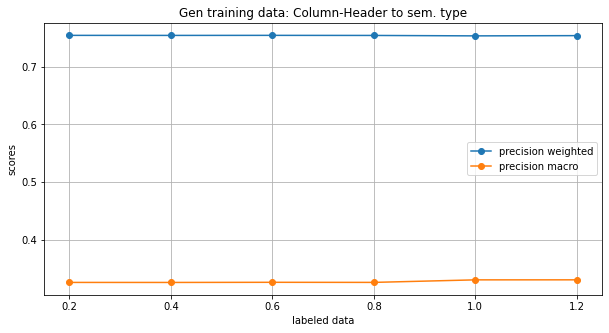

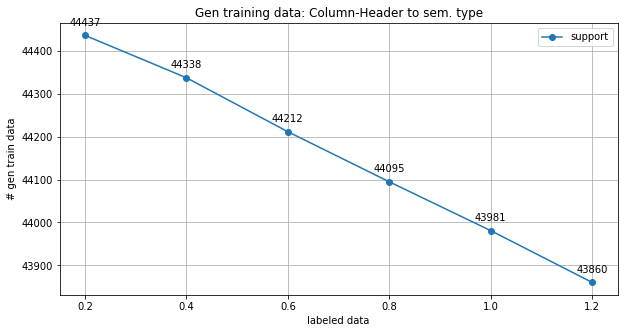

In [14]:
import os
from os.path import join
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

corpus = "turl"

labeled_data_sizes = [1,2,3,4,5]
labeled_data_size = 1
labeled_data_sizes = np.around(np.arange(0.2,1.4,0.2), 2)
cosine_sim_thresholds = [0.85,0.9]
avg = "weighted"
unlabeled_data_size = "absolute"
random_state =  2
cosine_sim_threshold = 0.9

# results = []
# for cosine_sim_threshold in cosine_sim_thresholds:
#     #for labeled_data_size in labeled_data_sizes:
#         result_file = join(
#             os.environ["WORKING_DIR"], "labeling_functions",
#             "header_to_sem_type_sim", "out", "validation",
#             f"{corpus}_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0.json"
#         )
#         try:
#             with open(result_file, "r") as f:
#                 result = json.load(f)
#         except:
#             continue
#         results.append(result)
results = []
for labeled_data_size in labeled_data_sizes:
    unlabeled_data_size = 100.0-20.0-labeled_data_size
    #for labeled_data_size in labeled_data_sizes:
    result_file = join(
        os.environ["WORKING_DIR"], "labeling_functions",
        "header_to_sem_type_sim", "out", "validation",
        f"{corpus}_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_{unlabeled_data_size}_20.0_{random_state}.json"
    )
    try:
        with open(result_file, "r") as f:
            result = json.load(f)
    except:
        continue
    results.append(result)

    

f1_scores = [x[f"{avg} avg"]["f1-score"] for x in results]
precisions = [x[f"{avg} avg"]["precision"] for x in results]
recalls = [x[f"{avg} avg"]["recall"] for x in results]
supports = [x[f"{avg} avg"]["support"] for x in results]


precisions_weighted = [x[f"weighted avg"]["precision"] for x in results]
precision_macro = [x[f"macro avg"]["precision"] for x in results]

# Plot f1, precision, recall
plt.figure(figsize=(10,5))
# plt.plot(cosine_sim_thresholds, f1_scores, marker="o", label=f"f1-score")
# plt.plot(cosine_sim_thresholds, precisions, marker="x", label="precision")
# plt.plot(cosine_sim_thresholds, recalls, marker="^", label="recall")
plt.plot(labeled_data_sizes, precisions_weighted, marker="o", label="precision weighted")
plt.plot(labeled_data_sizes, precision_macro, marker="o", label="precision macro")
plt.xlabel("labeled data")
plt.ylabel("scores")
plt.title(f"Gen training data: Column-Header to sem. type")
plt.grid()
plt.legend()
plt.show()

# Plot support of train data
plt.figure(figsize=(10,5))
plt.plot(labeled_data_sizes, supports, marker="o", label=f"support")

# zip joins x and y coordinates in pairs
for x,y in zip(labeled_data_sizes,supports):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.xlabel("labeled data")
plt.ylabel("# gen train data")
plt.title(f"Gen training data: Column-Header to sem. type")
plt.grid()
plt.legend()
plt.show()

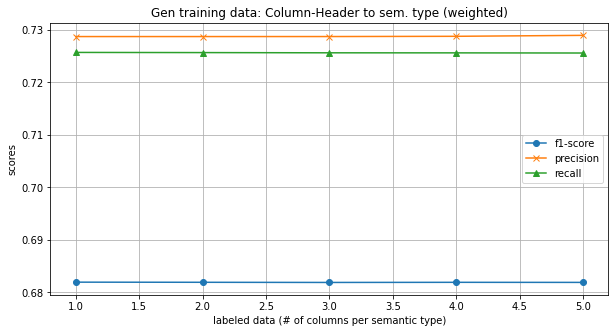

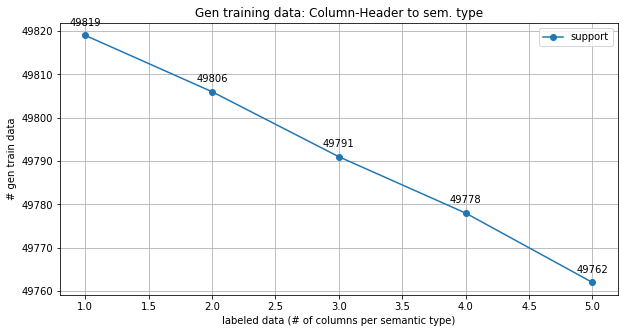

In [8]:
import os
from os.path import join
import pandas as pd
import json
import matplotlib.pyplot as plt

corpus = "turl"

labeled_data_sizes = [1,2,3,4,5]
#labeled_data_size = 1
cosine_sim_threshold = 0.9
avg = "weighted"

results = []
for labeled_data_size in labeled_data_sizes:
        result_file = join(
            os.environ["WORKING_DIR"], "labeling_functions",
            "header_to_sem_type_sim", "out", "validation",
            f"{corpus}_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0.json"
        )
        try:
            with open(result_file, "r") as f:
                result = json.load(f)
        except:
            continue
        results.append(result)
    

f1_scores = [x[f"{avg} avg"]["f1-score"] for x in results]
precisions = [x[f"{avg} avg"]["precision"] for x in results]
recalls = [x[f"{avg} avg"]["recall"] for x in results]
supports = [x[f"{avg} avg"]["support"] for x in results]


# Plot f1, precision, recall
plt.figure(figsize=(10,5))
plt.plot(labeled_data_sizes, f1_scores, marker="o", label=f"f1-score")
plt.plot(labeled_data_sizes, precisions, marker="x", label="precision")
plt.plot(labeled_data_sizes, recalls, marker="^", label="recall")
plt.xlabel("labeled data (# of columns per semantic type)")
plt.ylabel("scores")
plt.title(f"Gen training data: Column-Header to sem. type ({avg})")
plt.grid()
plt.legend()
plt.show()

# Plot support of train data
plt.figure(figsize=(10,5))
plt.plot(labeled_data_sizes, supports, marker="o", label=f"support")

# zip joins x and y coordinates in pairs
for x,y in zip(labeled_data_sizes,supports):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.xlabel("labeled data (# of columns per semantic type)")
plt.ylabel("# gen train data")
plt.title(f"Gen training data: Column-Header to sem. type")
plt.grid()
plt.legend()
plt.show()

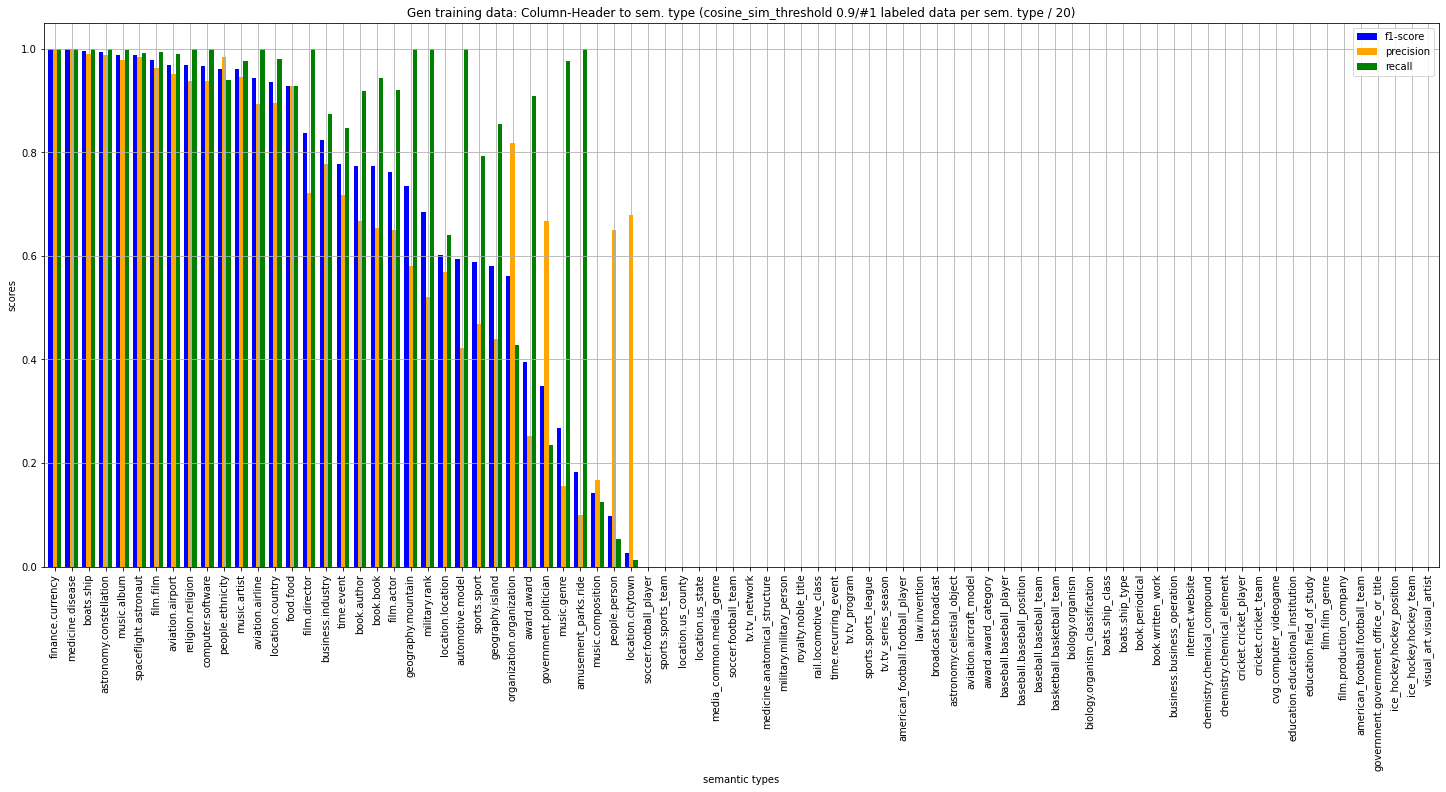

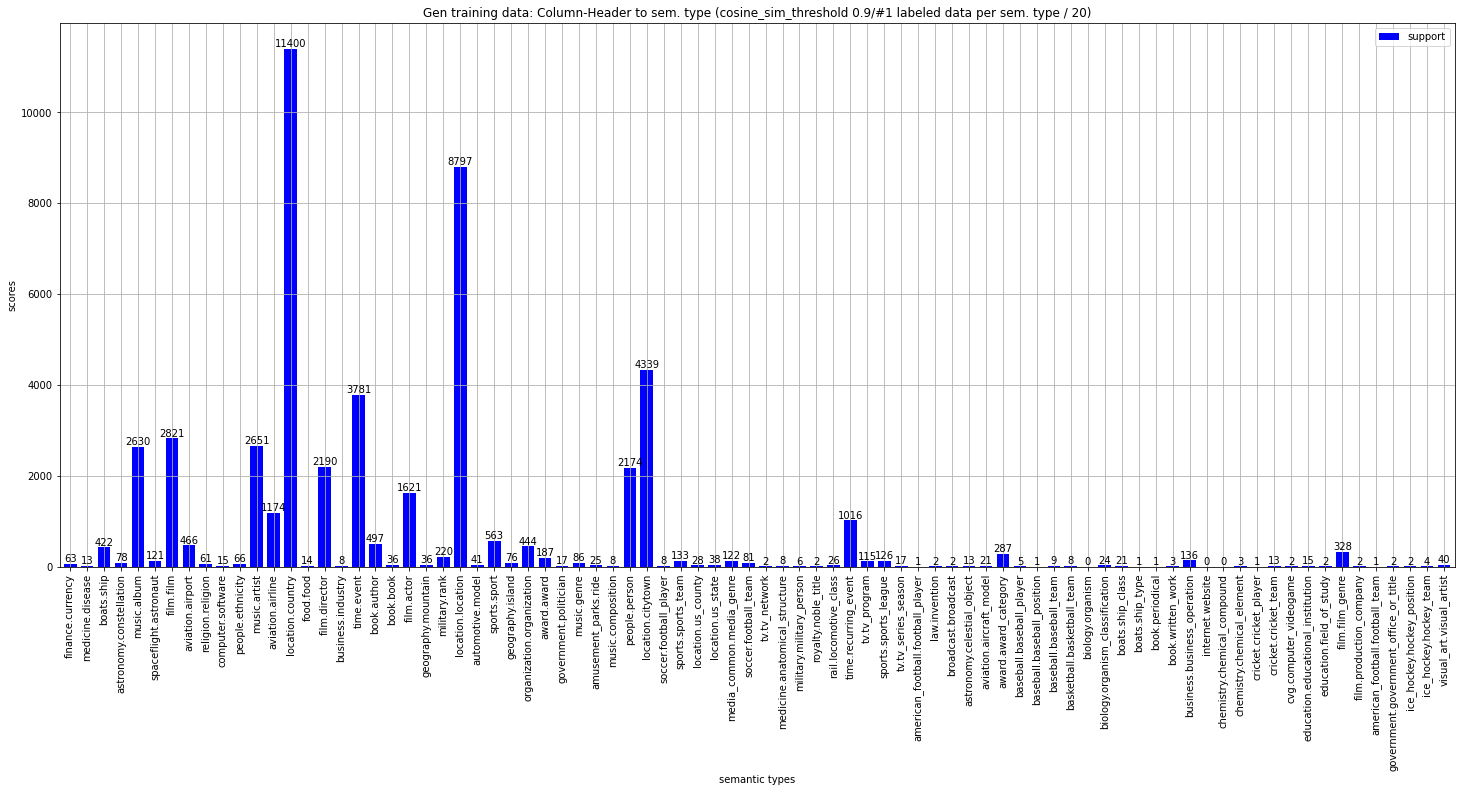

82

In [11]:
# plots per type
import os
from os.path import join
import pandas as pd
import json
import matplotlib.pyplot as plt

corpus = "turl"

labeled_data_size = 1
cosine_sim_thresholds = [0.9]
avg = "weighted"

for cosine_sim_threshold in cosine_sim_thresholds:
    result_file = join(
        os.environ["WORKING_DIR"], "labeling_functions",
        "header_to_sem_type_sim", "out", "validation",
        f"{corpus}_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0.json"
    )
    try:
        with open(result_file, "r") as f:
            classification_result = json.load(f)
    except:
        continue

results = []
for label in classification_result.keys():
    if label == "accuracy" or label == "macro avg" or label == "weighted avg":
        continue
    try:
        #if classification_result[label]["support"] > 0:
            results.append([label, classification_result[label]["f1-score"],classification_result[label]["precision"], classification_result[label]["recall"], classification_result[label]["support"]])
    except:
        print(label)
df_result = pd.DataFrame(results, columns=["label", "f1-score", "precision", "recall", "support"]).sort_values(by="f1-score", ascending=False)

ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall"], figsize=(25,10), label=["f1-score", "precision", "recall"], width=0.75, color=["blue", "orange", "green"])

# for container in ax.containers:
#     ax.bar_label(container)

plt.title(f"Gen training data: Column-Header to sem. type (cosine_sim_threshold {cosine_sim_threshold}/#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()


# Plot supports per semantic type
ax = df_result.plot.bar(x="label", y=["support"], figsize=(25,10), label=["support"], width=0.75, color=["blue"])

for container in ax.containers:
    ax.bar_label(container)

plt.title(f"Gen training data: Column-Header to sem. type (cosine_sim_threshold {cosine_sim_threshold}/#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()
len(df_result["label"])

In [4]:
## plot number of sem. types in generated training data
import pandas as pd
import os
from os.path import join

corpus = "turl"
cosine_sim_threshold = 0.9
labeled_data_size = 1

gen_training_data_path = join(os.environ["WORKING_DIR"], "labeling_functions", "header_to_sem_type_sim", "out", "gen_training_data")

df = pd.read_csv(join(gen_training_data_path, f"{corpus}_gen_training_data_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0.csv"))
len(df["predicted_semantic_type"].unique())


39

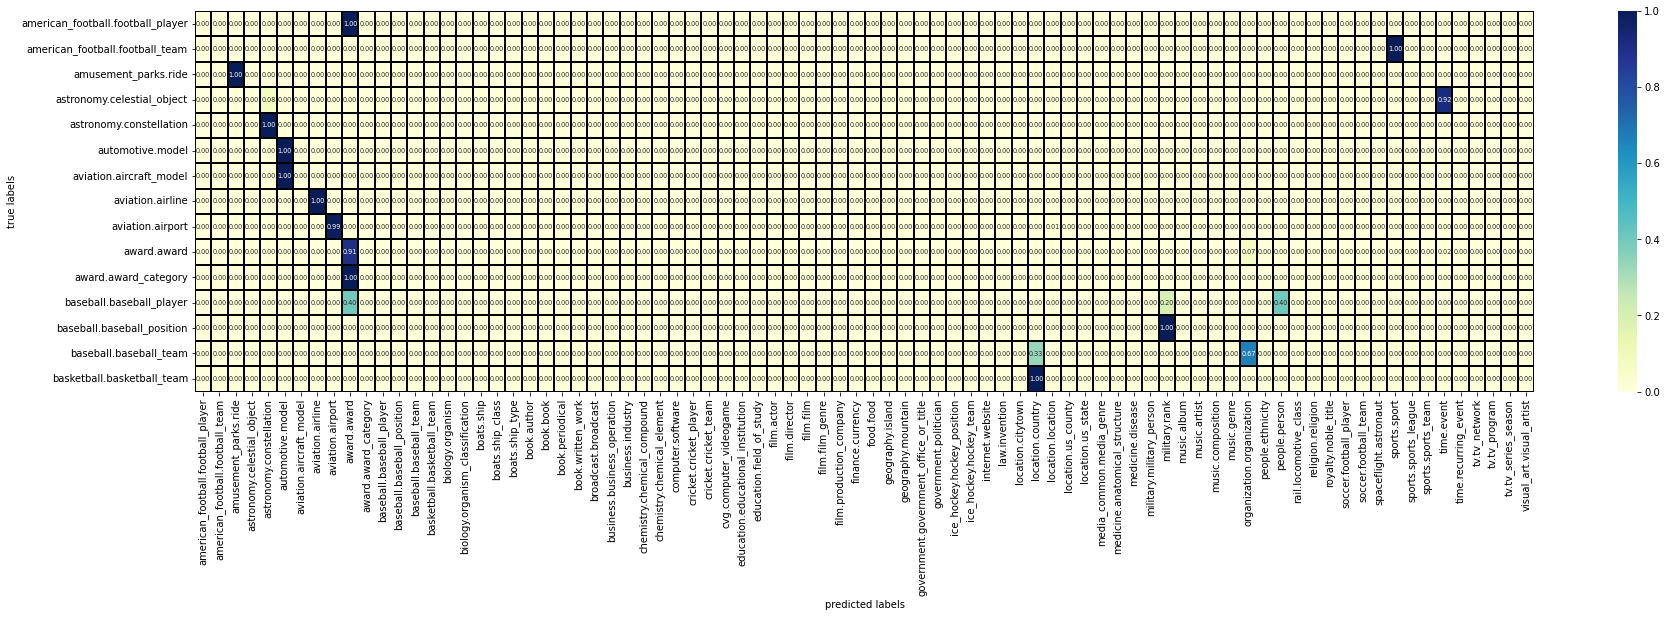

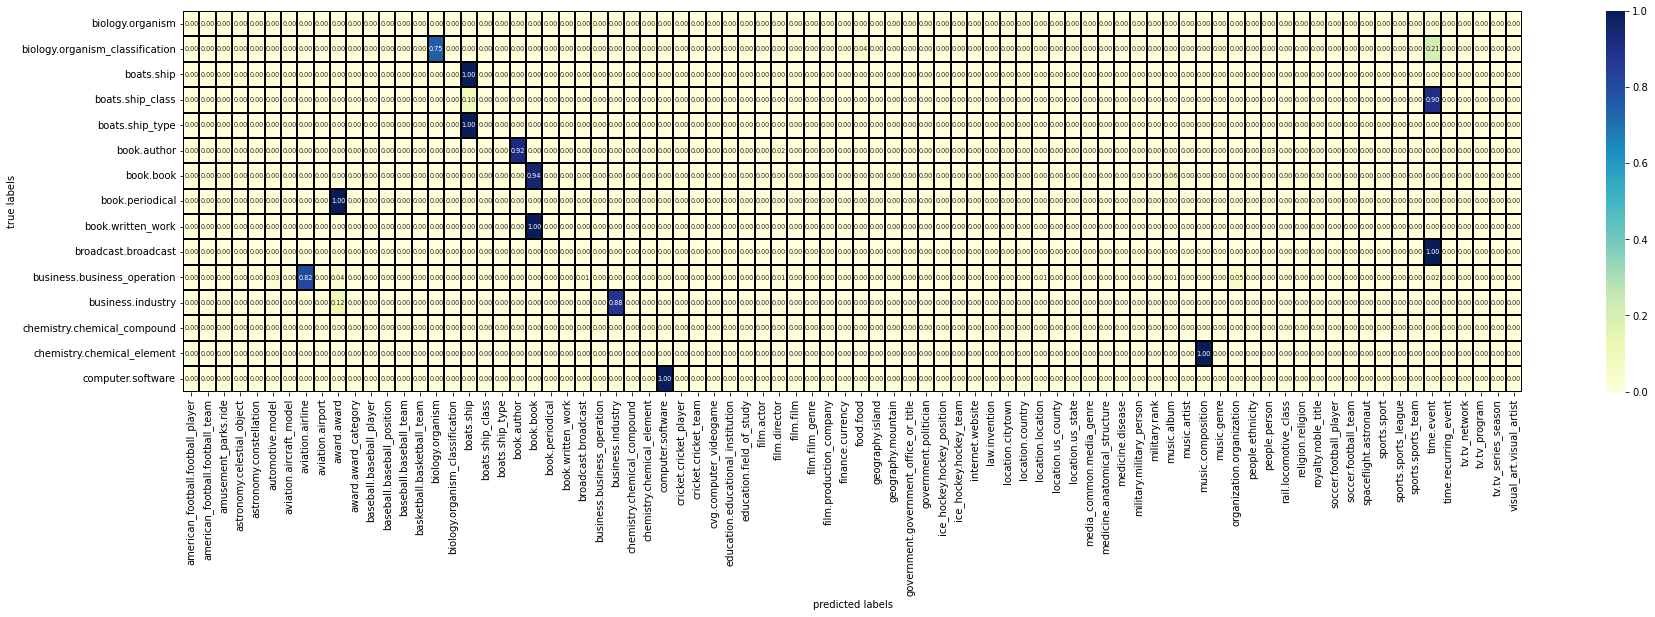

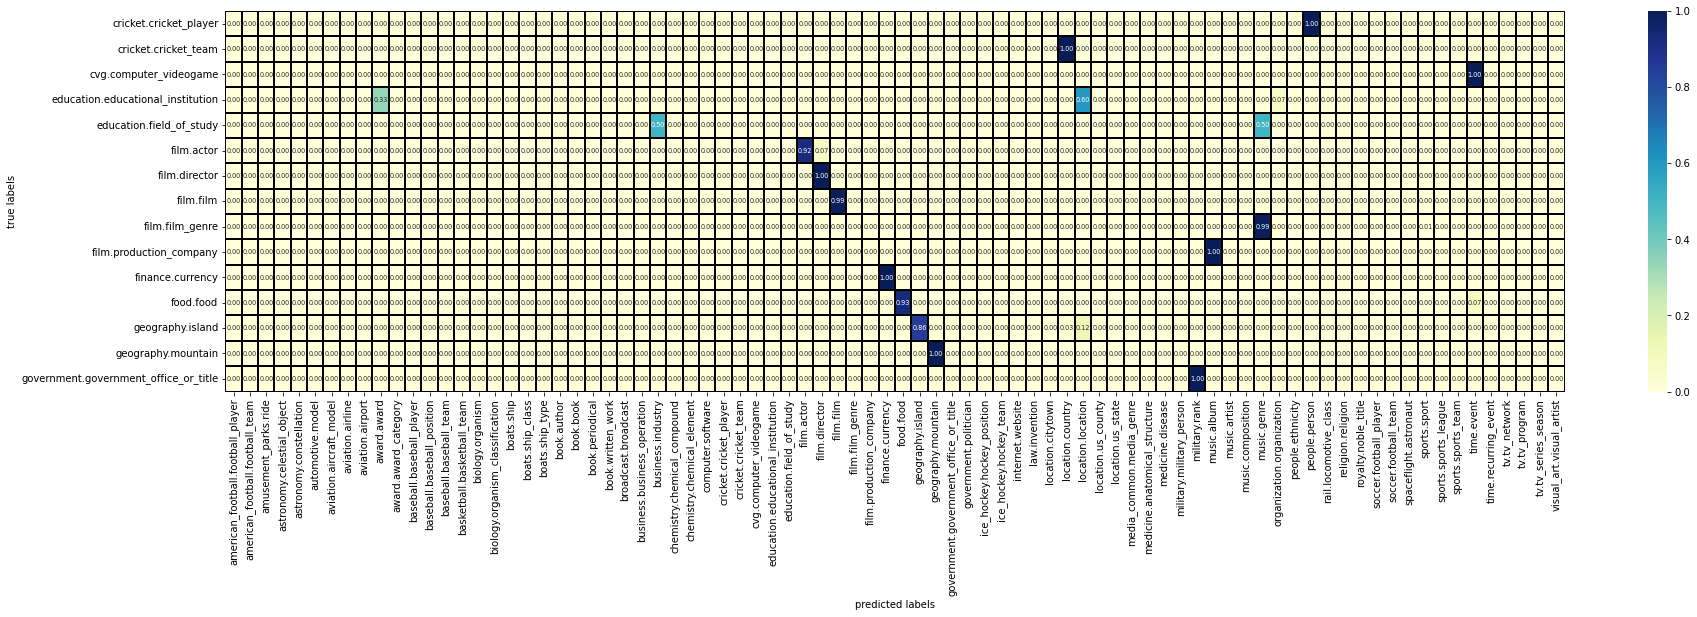

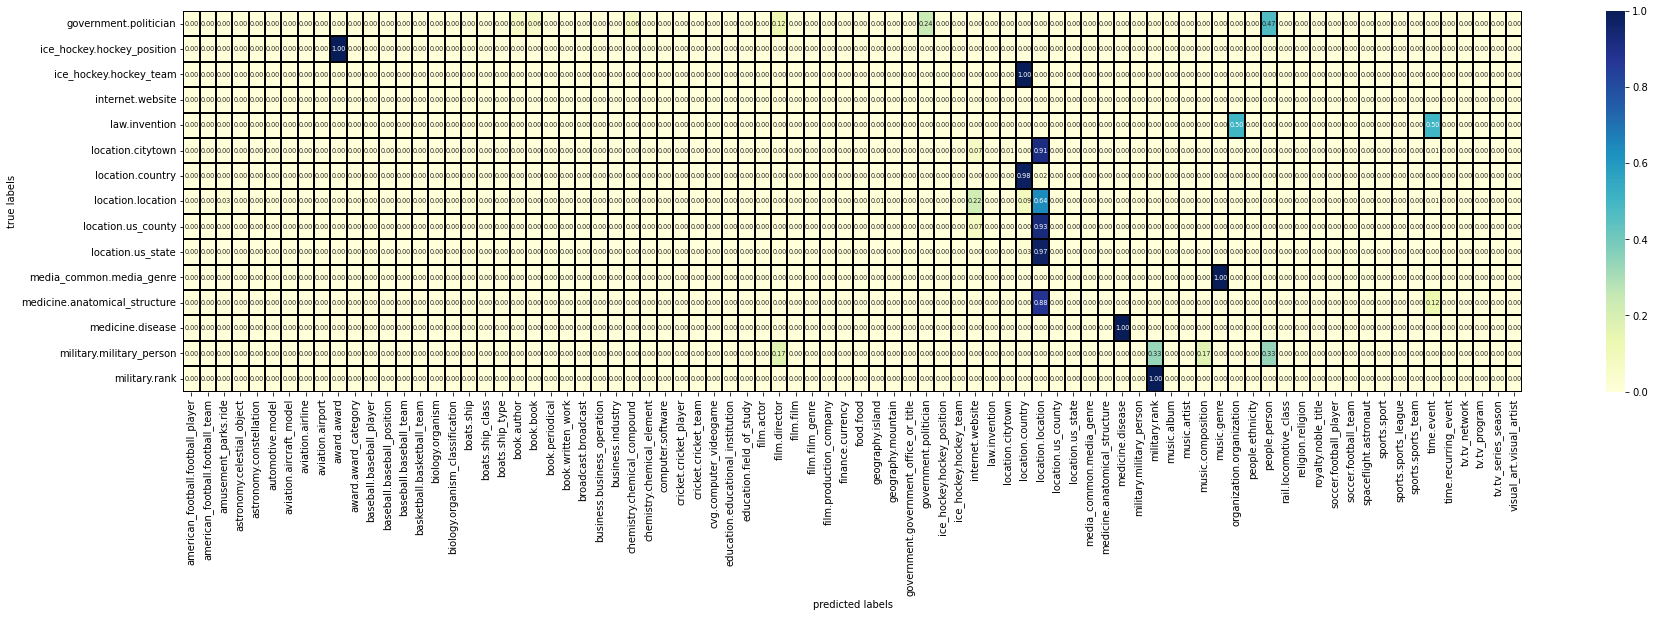

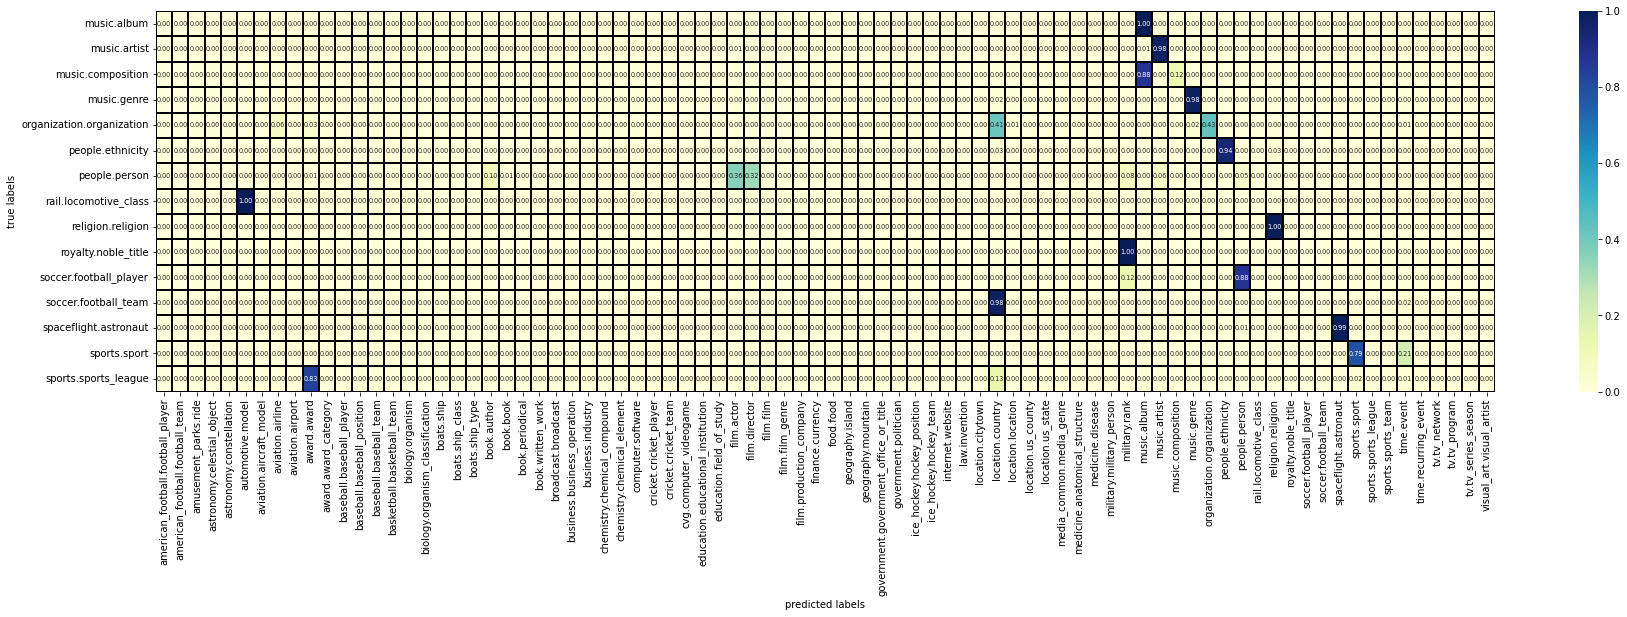

In [5]:
## plot confusion matrix
import pandas as pd
import os
from os.path import join
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

corpus = "turl"
cosine_sim_threshold = 0.9
labeled_data_size = 1

LF_results_path = join(os.environ["WORKING_DIR"], "labeling_functions", "header_to_sem_type_sim", "out", "results")

df = pd.read_csv(join(LF_results_path, f"{corpus}_header_to_sem_type_results_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0.csv"))
df = df[df["predicted_semantic_type"] != "None"]

y_true = df["semanticType"].tolist()
y_pred = df["predicted_semantic_type"].tolist()

## extract labels for cm
combined_unique_labels = np.unique((y_true+y_pred))

cm_data = confusion_matrix(y_true, y_pred, labels=combined_unique_labels, normalize="true")


number_of_lines_in_a_plot = 15
start = 0
end = start+number_of_lines_in_a_plot
while end < len(combined_unique_labels):
    plt.figure(figsize=(30,7))
    ax = sns.heatmap(cm_data[start:end], annot=True, fmt=".2f", annot_kws={"fontsize":6.5}, cmap="YlGnBu", vmax=1,  linewidths=0.01, linecolor="black", xticklabels=combined_unique_labels, yticklabels=combined_unique_labels[start:end])
    ax.set_xticklabels(combined_unique_labels, rotation=90)
    ax.set_yticklabels(combined_unique_labels[start:end], rotation=0)
    ax.set_ylabel("true labels")
    ax.set_xlabel("predicted labels")

    #plt.grid()
    plt.show()
    
    start = end
    end += number_of_lines_in_a_plot

# plot of dbpedia lookup

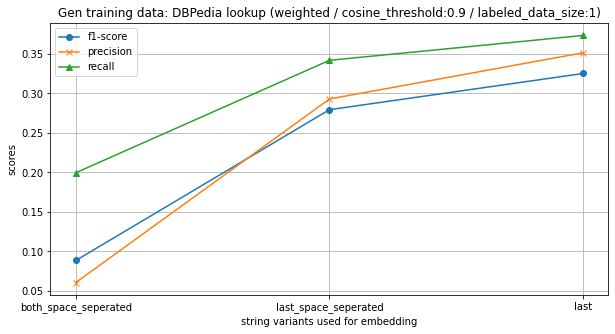

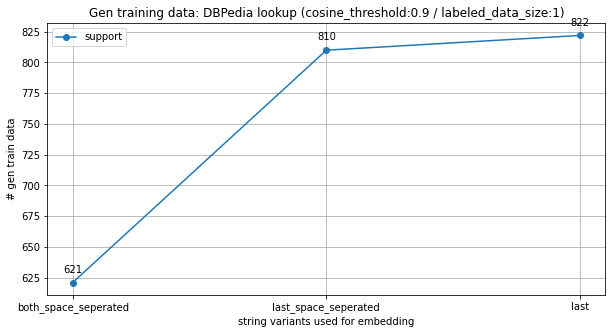

In [6]:
import os
from os.path import join
import pandas as pd
import json
import matplotlib.pyplot as plt

corpus = "turl"

variants = ["both_space_seperated", "last_space_seperated", "last"]
labeled_data_size = 1
cosine_sim_threshold = 0.9
avg = "weighted"

results = []
for variant in variants:
    #for labeled_data_size in labeled_data_sizes:
        result_file = join(
            os.environ["WORKING_DIR"], "labeling_functions",
            "knowledge_graph", "out", "validation",
            f"{corpus}_dbpedia_lookup_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0_{variant}.json"
        )
        try:
            with open(result_file, "r") as f:
                result = json.load(f)
        except:
            continue
        results.append(result)
    

f1_scores = [x[f"{avg} avg"]["f1-score"] for x in results]
precisions = [x[f"{avg} avg"]["precision"] for x in results]
recalls = [x[f"{avg} avg"]["recall"] for x in results]
supports = [x[f"{avg} avg"]["support"] for x in results]


# Plot f1, precision, recall
plt.figure(figsize=(10,5))
plt.plot(variants, f1_scores, marker="o", label=f"f1-score")
plt.plot(variants, precisions, marker="x", label="precision")
plt.plot(variants, recalls, marker="^", label="recall")
plt.xlabel("string variants used for embedding")
plt.ylabel("scores")
plt.title(f"Gen training data: DBPedia lookup ({avg} / cosine_threshold:{cosine_sim_threshold} / labeled_data_size:{labeled_data_size})")
plt.grid()
plt.legend()
plt.show()

# Plot support of train data
plt.figure(figsize=(10,5))
plt.plot(variants, supports, marker="o", label=f"support")

# zip joins x and y coordinates in pairs
for x,y in zip(variants,supports):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.xlabel("string variants used for embedding")
plt.ylabel("# gen train data")
plt.title(f"Gen training data: DBPedia lookup (cosine_threshold:{cosine_sim_threshold} / labeled_data_size:{labeled_data_size})")
plt.grid()
plt.legend()
plt.show()

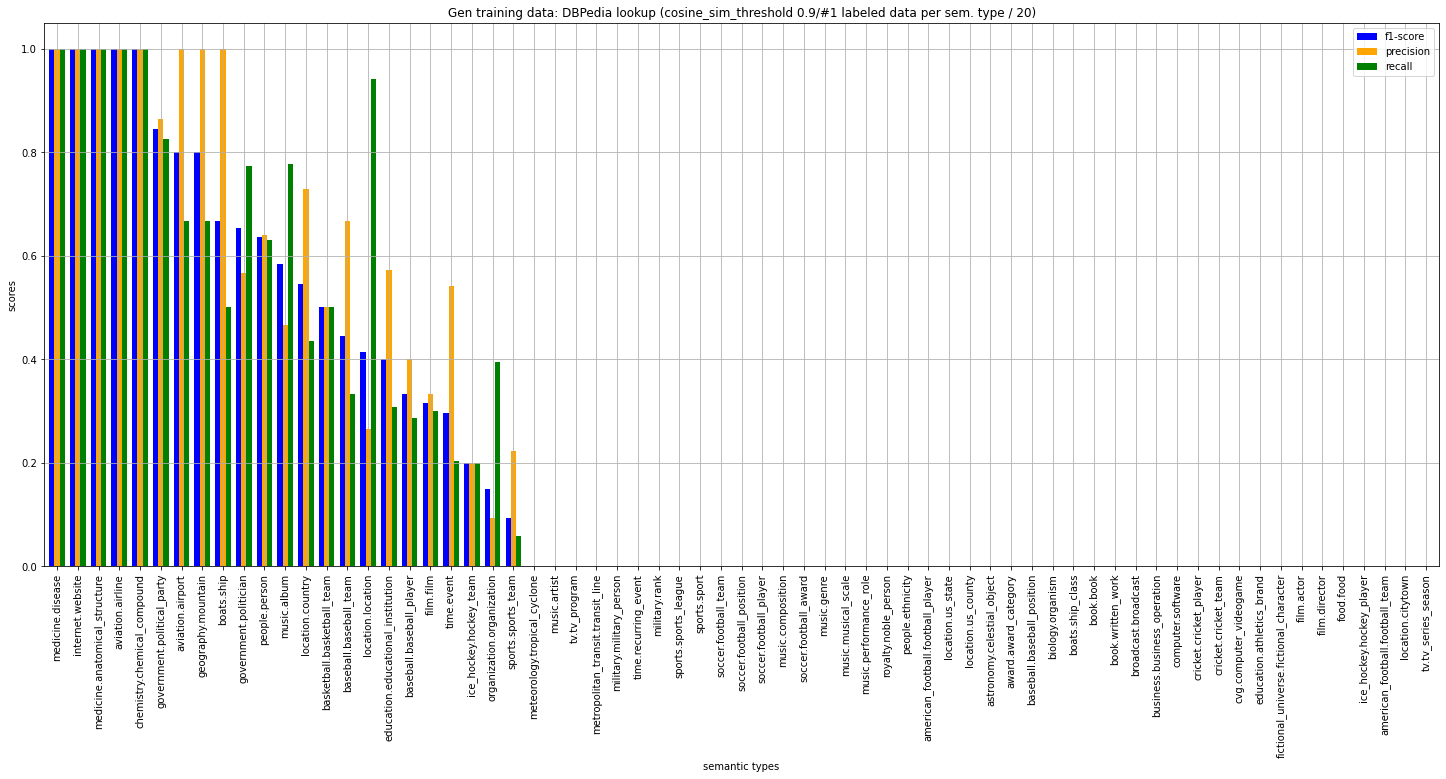

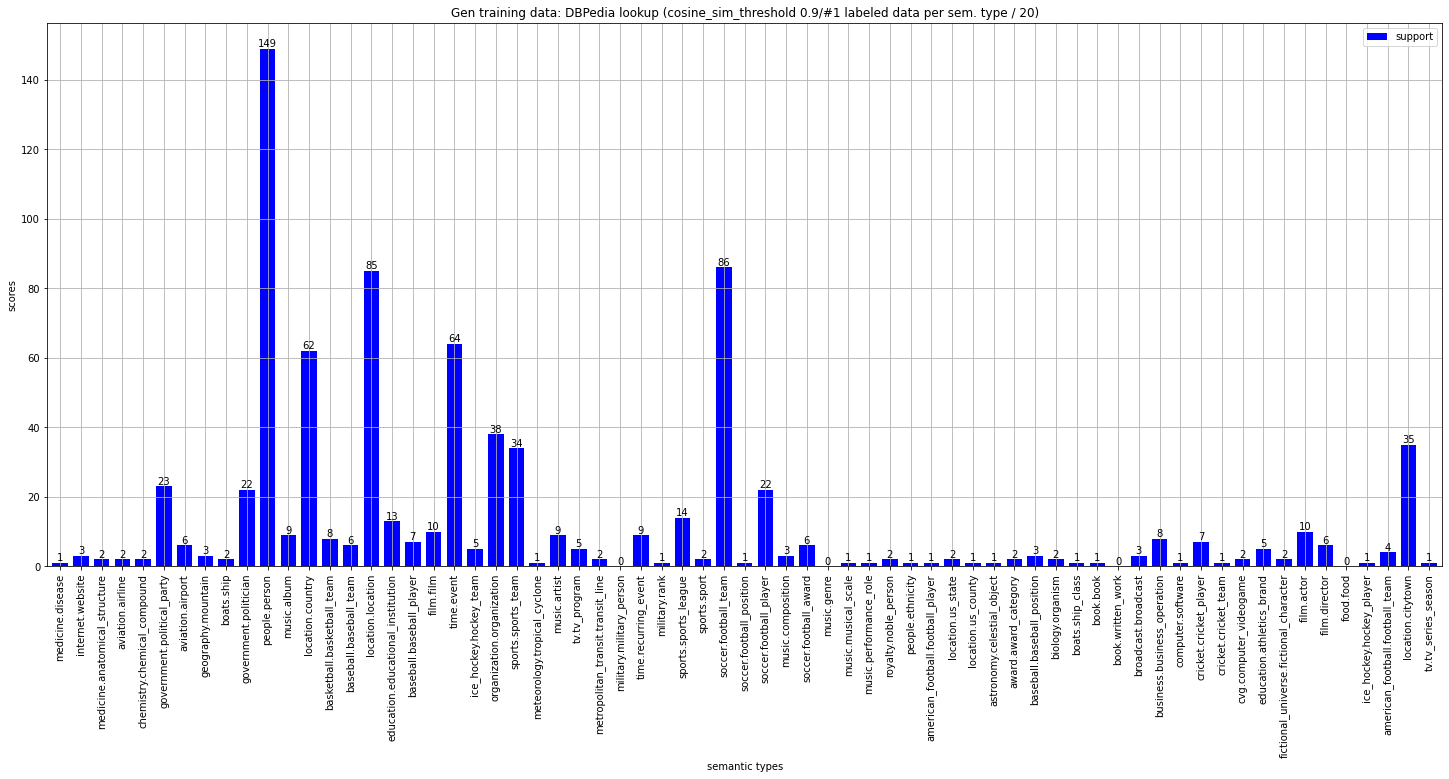

67

In [8]:
import os
from os.path import join
import pandas as pd
import json
import matplotlib.pyplot as plt

corpus = "turl"

variants = ["both_space_seperated", "last_space_seperated", "last"]
variant = "last"
labeled_data_size = 1
cosine_sim_threshold = 0.9
avg = "weighted"

#for variant in variants:
    #for labeled_data_size in labeled_data_sizes:
result_file = join(
    os.environ["WORKING_DIR"], "labeling_functions",
    "knowledge_graph", "out", "validation",
    f"{corpus}_dbpedia_lookup_classification_report_unlabeled_{cosine_sim_threshold}_{labeled_data_size}_absolute_20.0_{variant}.json"
)
try:
    with open(result_file, "r") as f:
        classification_result = json.load(f)
except:
    pass

results = []
for label in classification_result.keys():
    if label == "accuracy" or label == "macro avg" or label == "weighted avg":
        continue
    try:
        #if classification_result[label]["support"] > 0:
            results.append([label, classification_result[label]["f1-score"],classification_result[label]["precision"], classification_result[label]["recall"], classification_result[label]["support"]])
    except:
        print(label)
df_result = pd.DataFrame(results, columns=["label", "f1-score", "precision", "recall", "support"]).sort_values(by="f1-score", ascending=False)

ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall"], figsize=(25,10), label=["f1-score", "precision", "recall"], width=0.75, color=["blue", "orange", "green"])

# for container in ax.containers:
#     ax.bar_label(container)

plt.title(f"Gen training data: DBPedia lookup (cosine_sim_threshold {cosine_sim_threshold}/#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()


# Plot supports per semantic type
ax = df_result.plot.bar(x="label", y=["support"], figsize=(25,10), label=["support"], width=0.75, color=["blue"])

for container in ax.containers:
    ax.bar_label(container)

plt.title(f"Gen training data: DBPedia lookup (cosine_sim_threshold {cosine_sim_threshold}/#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()
len(df_result["label"])

# Plot of check element in col

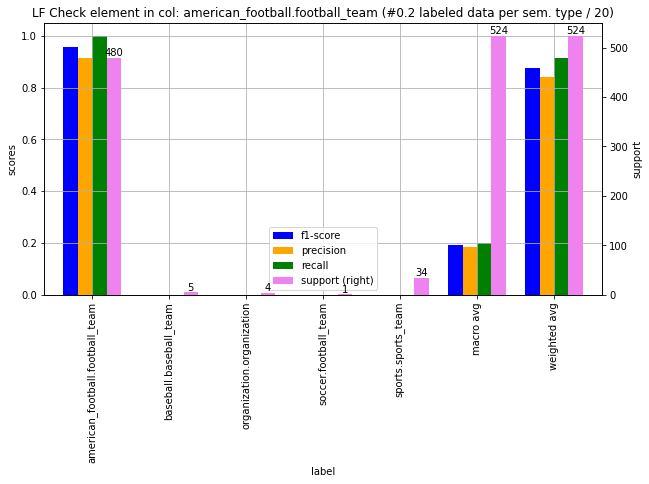

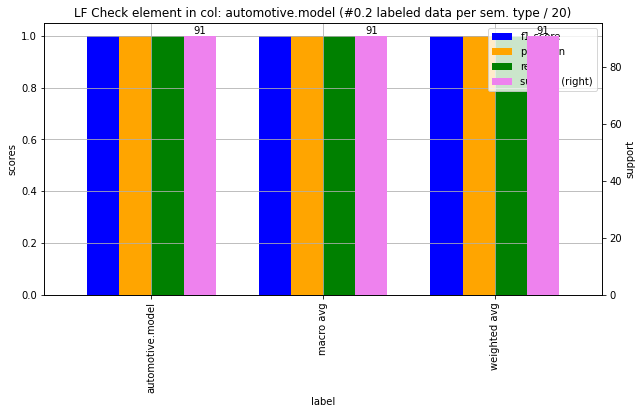

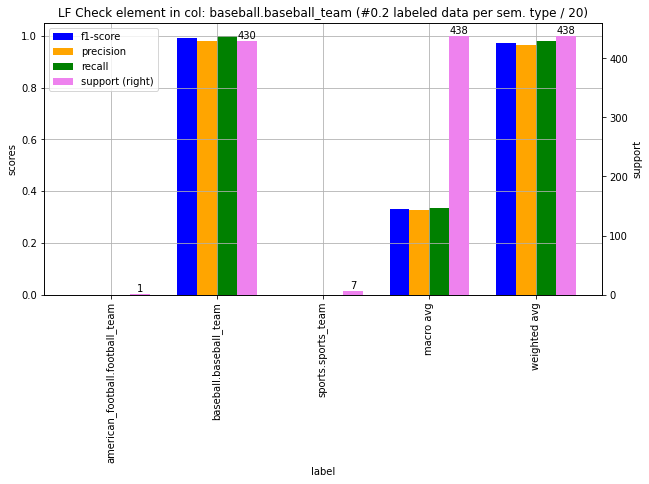

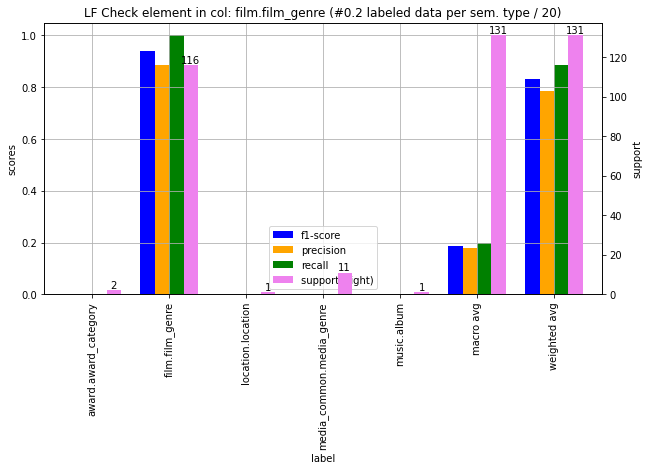

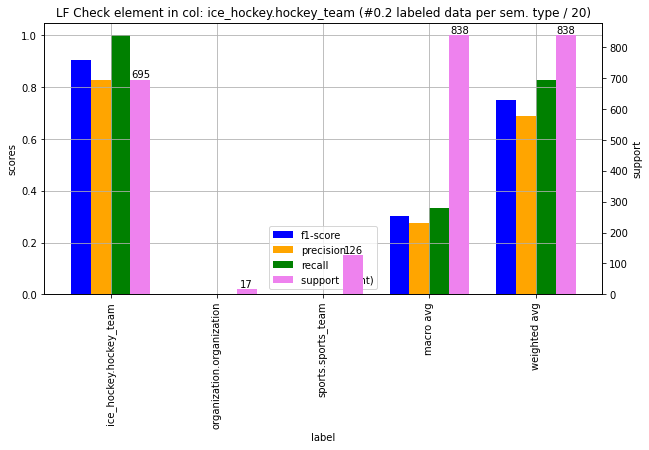

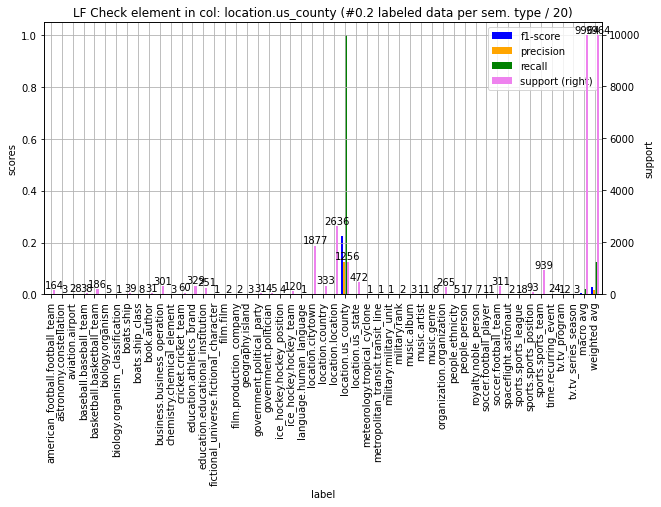

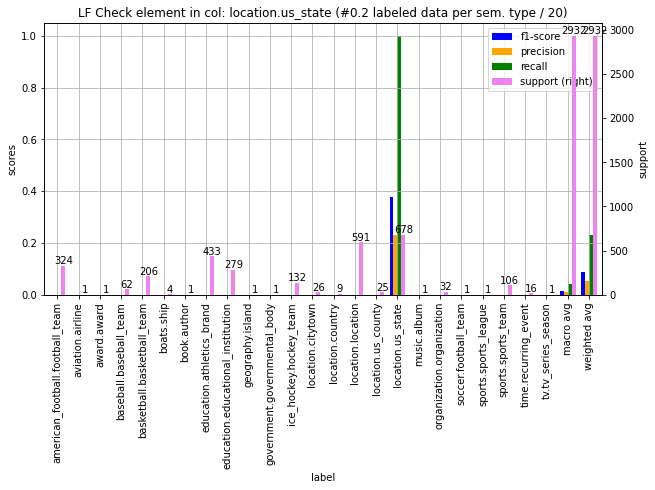

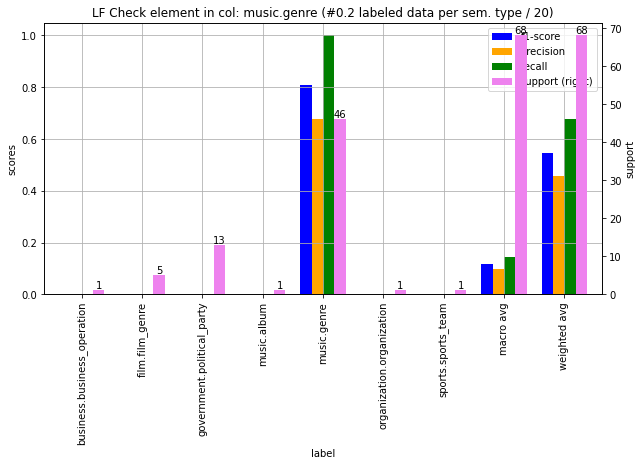

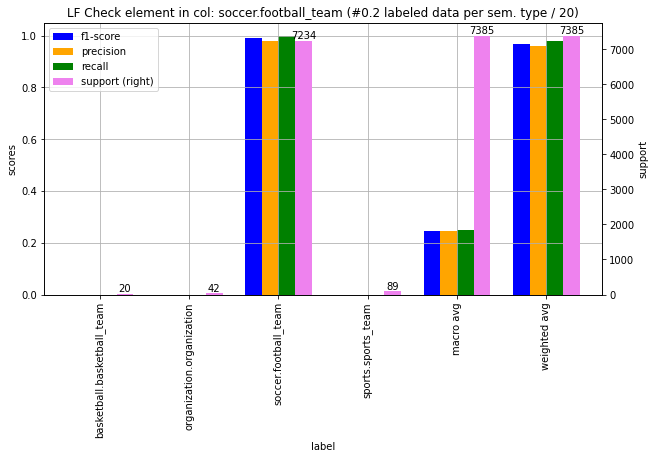

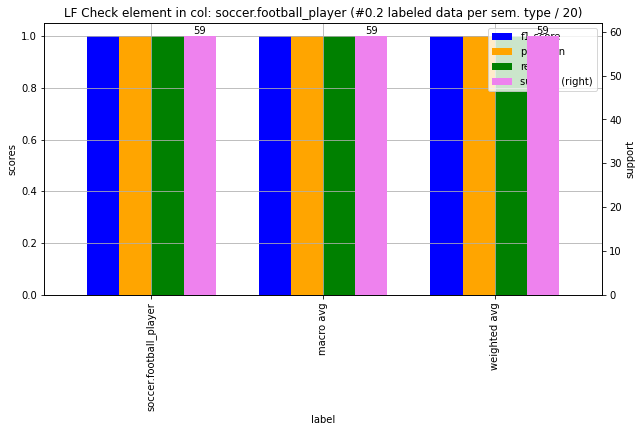

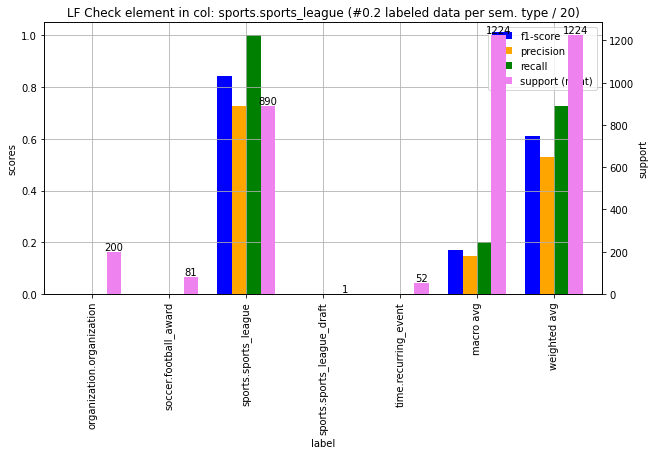

In [57]:
import os
import sys
from os.path import join
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

TYPENAME = "type_turl"
corpus = "turl"
labeled_data_size = 0.2
test_data_size = 20.0
unlabeled_data_size = 100-20.0-labeled_data_size
distance_threshold = 1e-2
cosine_sim_threshold = 0.9
random_state = 2

current_label = "american_football.football_team"

check_elements_types = [
            "american_football.football_team",
            "automotive.model",
            "baseball.baseball_team",
            "film.film_genre",
            "ice_hockey.hockey_team",
            "location.us_county",
            "location.us_state",
            "music.genre",
            "soccer.football_team",
            "soccer.football_player",
            "sports.sports_league",
        ]

regex_elements_in_col = [
            "aviation.aircraft_model", "internet.website",
            "award.award_category", "film.director",
            "american_football.football_player", "boats.ship_class",
            "cricket.cricket_player", "military.military_unit"
        ]

for current_label in check_elements_types:
    # LabelEncoder
    with open(join(os.environ["WORKING_DIR"], "data", "extract", "out", "valid_types", "types.json")) as f:
        valid_types = json.load(f)[TYPENAME]

    label_enc = LabelEncoder()
    label_enc.fit(valid_types)

    if unlabeled_data_size == "absolute":
        class_result_path = join(
            os.environ["WORKING_DIR"], "labeling_functions", "check_elements_in_col",
            "out", "validation",
            f"{corpus}_classification_report_unlabeled_{current_label}_0.2_{labeled_data_size}_{unlabeled_data_size}_20.0_{random_state}.json"
        )
    else:
        class_result_path = join(
            os.environ["WORKING_DIR"], "labeling_functions", "check_elements_in_col",
            "out", "validation",
            f"{corpus}_classification_report_unlabeled_{current_label}_0.2_{labeled_data_size}_{100.0-20.0-labeled_data_size}_20.0_{random_state}.json"
        )

    with open(class_result_path, "r") as f:
        classification_result = json.load(f)

    results = []
    for label in classification_result.keys():
        if label == "accuracy":# or label == "macro avg":# or label == "weighted avg":
            continue
        try:
            #if classification_result[label]["support"] > 0:
                results.append([label, classification_result[label]["f1-score"],classification_result[label]["precision"], classification_result[label]["recall"], classification_result[label]["support"]])
        except:
            print(label)
    df_result = pd.DataFrame(results, columns=["label", "f1-score", "precision", "recall", "support"])

    ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall", "support"], figsize=(10,5), label=["f1-score", "precision", "recall", "support"], width=0.75, color=["blue", "orange", "green", "violet"], secondary_y=["support"])
    #df_result.plot.bar(x="label", y=["support"], label=["support"], width=0.75, color=["blue"], ax=ax, secondary_y=True)
    ax.set_ylabel("scores")
    ax.grid()
    ax.right_ax.set_ylabel("support")
    for container in ax.right_ax.containers:
        ax.right_ax.bar_label(container)

    plt.title(f"LF Check element in col: {current_label} (#{labeled_data_size} labeled data per sem. type / {20})")
    plt.xlabel("semantic types")
    #plt.grid()
    plt.show()

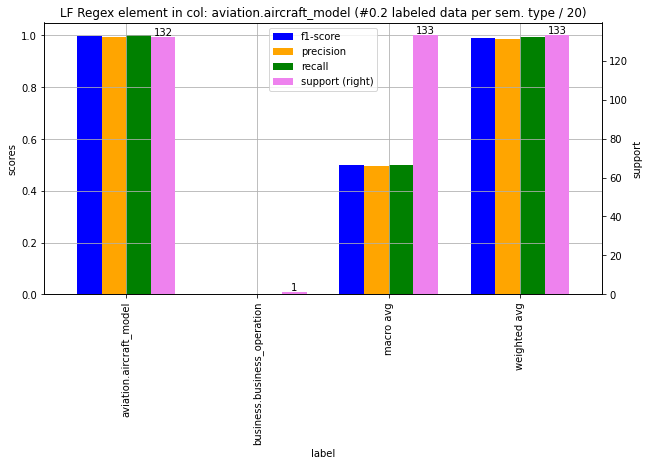

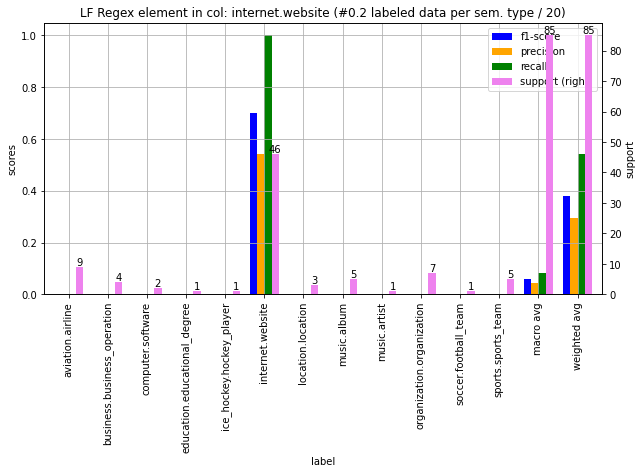

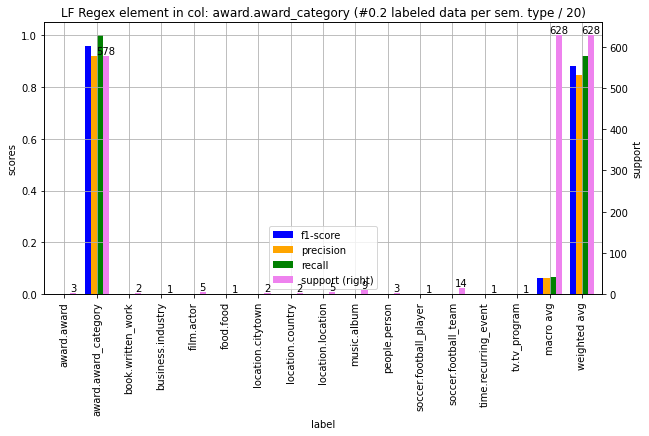

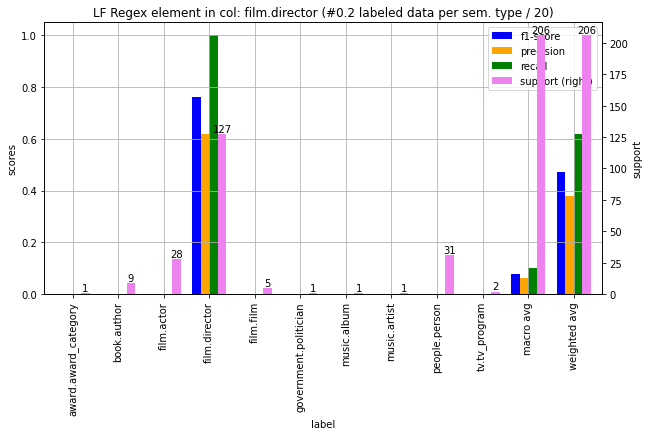

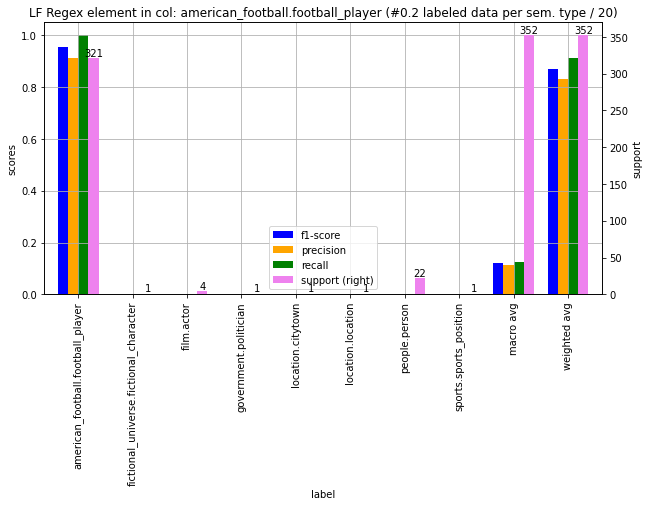

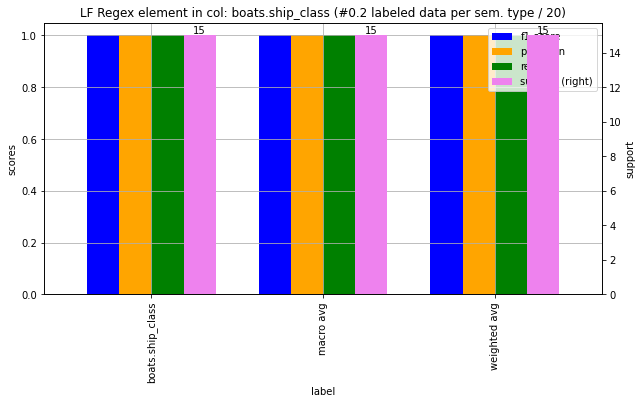

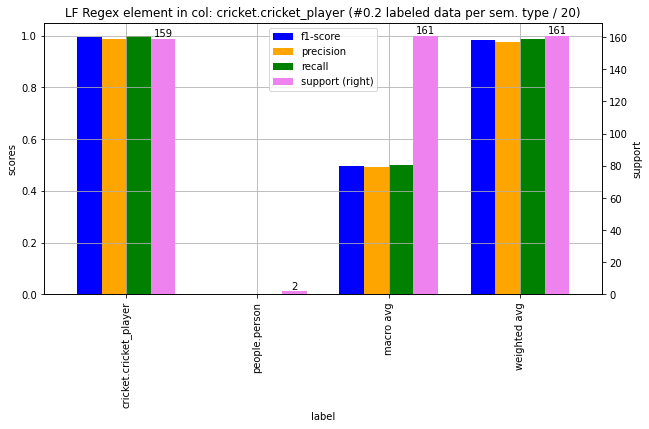

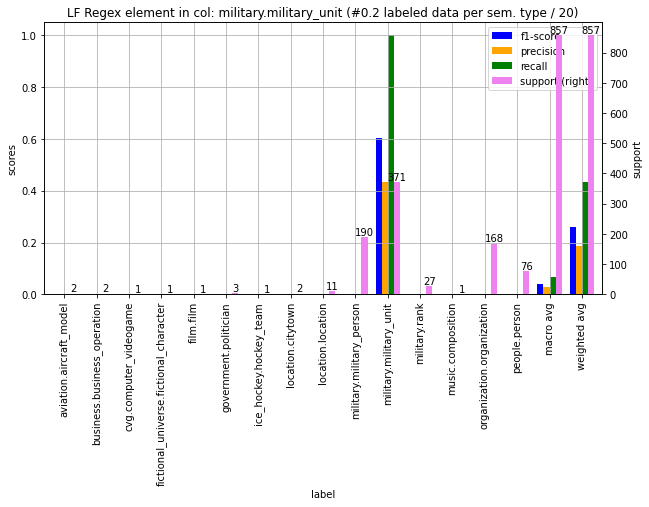

In [58]:
import os
import sys
from os.path import join
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

TYPENAME = "type_turl"
corpus = "turl"
labeled_data_size = 0.2
test_data_size = 20.0
unlabeled_data_size = 100-20.0-labeled_data_size
distance_threshold = 1e-2
cosine_sim_threshold = 0.9
random_state = 2

current_label = "american_football.football_team"

regex_elements_in_col = [
            "aviation.aircraft_model", "internet.website",
            "award.award_category", "film.director",
            "american_football.football_player", "boats.ship_class",
            "cricket.cricket_player", "military.military_unit"
        ]

for current_label in regex_elements_in_col:
    # LabelEncoder
    with open(join(os.environ["WORKING_DIR"], "data", "extract", "out", "valid_types", "types.json")) as f:
        valid_types = json.load(f)[TYPENAME]

    label_enc = LabelEncoder()
    label_enc.fit(valid_types)

    if unlabeled_data_size == "absolute":
        class_result_path = join(
            os.environ["WORKING_DIR"], "labeling_functions", "regex_elements_in_col",
            "out", "validation",
            f"{corpus}_classification_report_unlabeled_{current_label}_0.2_{labeled_data_size}_{unlabeled_data_size}_20.0_{random_state}.json"
        )
    else:
        class_result_path = join(
            os.environ["WORKING_DIR"], "labeling_functions", "regex_elements_in_col",
            "out", "validation",
            f"{corpus}_classification_report_unlabeled_{current_label}_0.2_{labeled_data_size}_{100.0-20.0-labeled_data_size}_20.0_{random_state}.json"
        )

    with open(class_result_path, "r") as f:
        classification_result = json.load(f)

    results = []
    for label in classification_result.keys():
        if label == "accuracy":# or label == "macro avg":# or label == "weighted avg":
            continue
        try:
            #if classification_result[label]["support"] > 0:
                results.append([label, classification_result[label]["f1-score"],classification_result[label]["precision"], classification_result[label]["recall"], classification_result[label]["support"]])
        except:
            print(label)
    df_result = pd.DataFrame(results, columns=["label", "f1-score", "precision", "recall", "support"])

    ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall", "support"], figsize=(10,5), label=["f1-score", "precision", "recall", "support"], width=0.75, color=["blue", "orange", "green", "violet"], secondary_y=["support"])
    #df_result.plot.bar(x="label", y=["support"], label=["support"], width=0.75, color=["blue"], ax=ax, secondary_y=True)
    ax.set_ylabel("scores")
    ax.grid()
    ax.right_ax.set_ylabel("support")
    for container in ax.right_ax.containers:
        ax.right_ax.bar_label(container)

    plt.title(f"LF Regex element in col: {current_label} (#{labeled_data_size} labeled data per sem. type / {20})")
    plt.xlabel("semantic types")
    #plt.grid()
    plt.show()

In [1]:
import matplotlib
matplotlib.__version__

C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\semantic_data_lake\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


'3.4.0'

# Plot of check regex in col

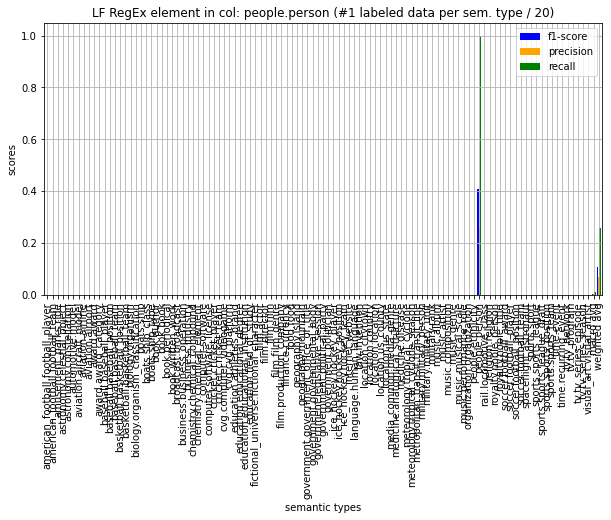

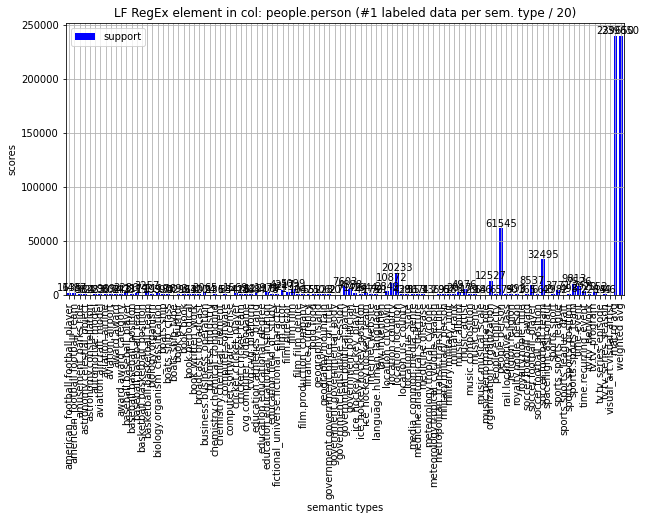

In [43]:
import os
import sys
from os.path import join
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

TYPENAME = "type_turl"
corpus = "turl"
labeled_data_size = 1
test_data_size = 20.0
unlabeled_data_size = "absolute"
distance_threshold = 1e-2
cosine_sim_threshold = 0.9

current_label = "people.person"


# LabelEncoder
with open(join(os.environ["WORKING_DIR"], "data", "extract", "out", "valid_types", "types.json")) as f:
    valid_types = json.load(f)[TYPENAME]

label_enc = LabelEncoder()
label_enc.fit(valid_types)

class_result_path = join(
    os.environ["WORKING_DIR"], "labeling_functions", "regex_elements_in_col",
    "out", "validation",
    f"{corpus}_classification_report_unlabeled_{current_label}_0.2_{labeled_data_size}_absolute_20.0.json"
)

with open(class_result_path, "r") as f:
    classification_result = json.load(f)

results = []
for label in classification_result.keys():
    if label == "accuracy":# or label == "macro avg":# or label == "weighted avg":
        continue
    try:
        #if classification_result[label]["support"] > 0:
            results.append([label, classification_result[label]["f1-score"],classification_result[label]["precision"], classification_result[label]["recall"], classification_result[label]["support"]])
    except:
        print(label)
df_result = pd.DataFrame(results, columns=["label", "f1-score", "precision", "recall", "support"])

ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall"], figsize=(10,5), label=["f1-score", "precision", "recall"], width=0.75, color=["blue", "orange", "green"])

# for container in ax.containers:
#     ax.bar_label(container)

plt.title(f"LF RegEx element in col: {current_label} (#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()


# Plot supports per semantic type
ax = df_result.plot.bar(x="label", y=["support"], figsize=(10,5), label=["support"], width=0.75, color=["blue"])

for container in ax.containers:
    ax.bar_label(container)

plt.title(f"LF RegEx element in col: {current_label} (#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()

# Plot of combined LFs

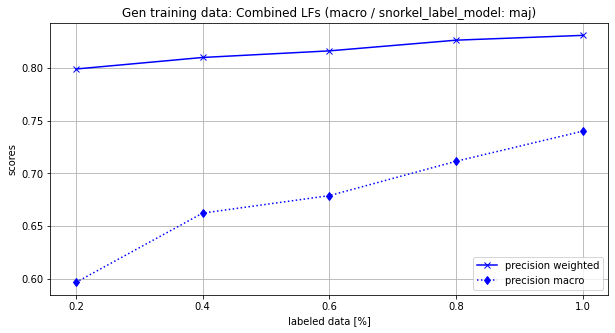

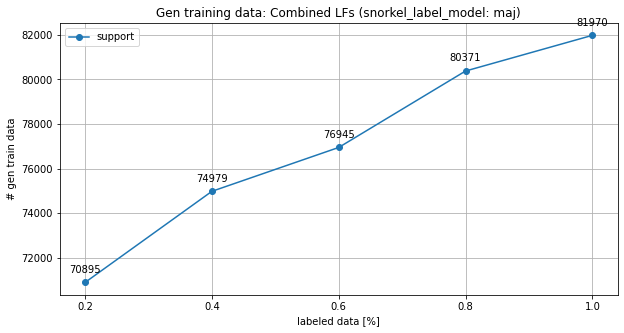

In [63]:
# plot quantity
from sklearn.metrics import classification_report
import pandas as pd
import os
from os.path import join
import matplotlib.pyplot as plt
import json
import numpy as np


corpus = "turl"
#labeled_data_sizes = [1,2,3,4,5]
labeled_data_sizes = np.around(np.arange(0.2,1.2,0.2),2)
#distance_threshold = 1e-2
#cosine_sim_threshold = 0.9
avg = "macro"
snorkel_label_model = "maj"
unlabeled_data_size = "absolute"
random_state = 2

results = []
for labeled_data_size in labeled_data_sizes:
    unlabeled_data_size = 100.00-20.0-labeled_data_size
    class_result_path = join(
        os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "validation",
        f"{corpus}_classification_report_unlabeled_{snorkel_label_model}_{labeled_data_size}_{unlabeled_data_size}_20.0_{random_state}.json"
    )

    with open(class_result_path, "r") as f:
        class_report = json.load(f)

    results.append(class_report)

f1_scores = [x[f"{avg} avg"]["f1-score"] for x in results]
precisions = [x[f"{avg} avg"]["precision"] for x in results]
recalls = [x[f"{avg} avg"]["recall"] for x in results]
supports = [x[f"{avg} avg"]["support"] for x in results]

precision_weighted = [x[f"weighted avg"]["precision"] for x in results]
precision_macro = [x[f"macro avg"]["precision"] for x in results]


# Plot f1, precision, recall
plt.figure(figsize=(10,5))
# plt.plot(labeled_data_sizes, f1_scores, marker="o", label=f"f1-score")
# plt.plot(labeled_data_sizes, precisions, marker="x", label="precision")
# plt.plot(labeled_data_sizes, recalls, marker="^", label="recall")
plt.plot(labeled_data_sizes, precision_weighted, marker="x", color="blue", label="precision weighted")
plt.plot(labeled_data_sizes, precision_macro, marker="d", color="blue", linestyle="dotted", label="precision macro")
plt.xlabel("labeled data [%]")
plt.ylabel("scores")
plt.title(f"Gen training data: Combined LFs ({avg} / snorkel_label_model: {snorkel_label_model})")
plt.xticks(labeled_data_sizes)
plt.grid()
plt.legend()
plt.show()

# Plot support of train data
plt.figure(figsize=(10,5))
plt.plot(labeled_data_sizes, supports, marker="o", label=f"support")

# zip joins x and y coordinates in pairs
for x,y in zip(labeled_data_sizes,supports):
    if y == None: continue

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

plt.xlabel("labeled data [%]")
plt.ylabel("# gen train data")
plt.title(f"Gen training data: Combined LFs (snorkel_label_model: {snorkel_label_model})")
plt.xticks(labeled_data_sizes)
plt.grid()
plt.legend()
plt.show()

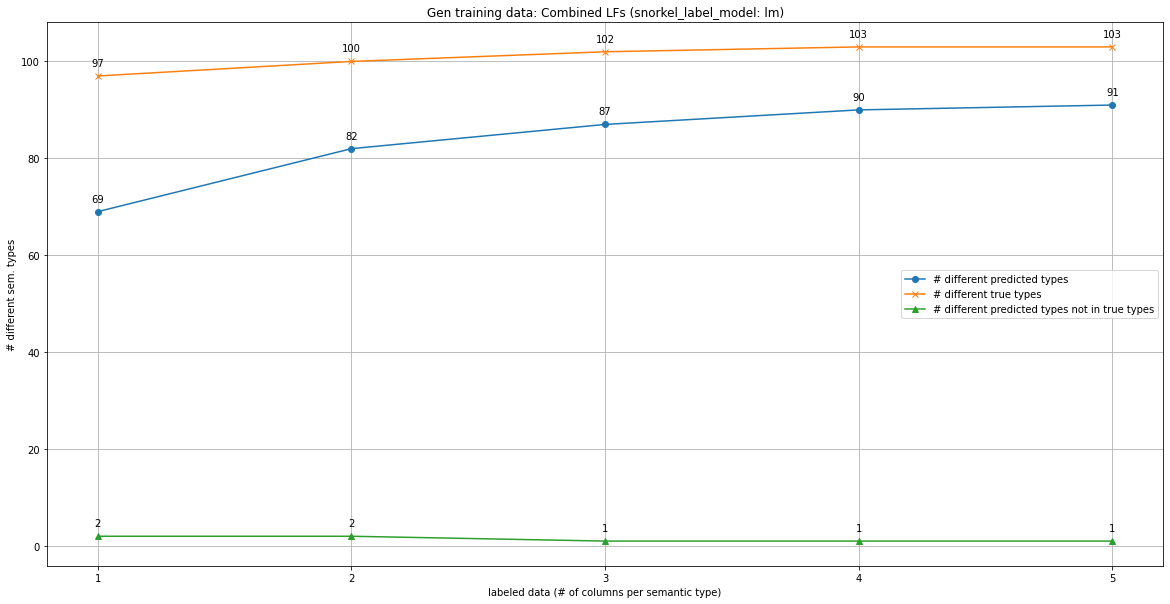

In [11]:
# plot of # of semantic types in gen _train data
# plot quantity
from sklearn.metrics import classification_report
import pandas as pd
import os
from os.path import join
import matplotlib.pyplot as plt

corpus = "turl"
labeled_data_sizes = [1,2,3,4,5]
avg = "weighted"
snorkel_label_model = "lm"

predicted_unique_labels = []
false_predicted_unique_labels = []
real_unique_labels = []
for labeled_data_size in labeled_data_sizes:
    gen_train_data = join(
        os.environ["WORKING_DIR"], "labeling_functions", "combined_LFs", "results",
        f"{corpus}_results_{snorkel_label_model}_{labeled_data_size}_absolute_20.0.csv"
    )

    df_combined = pd.read_csv(gen_train_data)
    df_combined = df_combined[df_combined["predicted_semantic_type"] != "None"]
    
    #cls_report = classification_report(df_combined["semanticType"], df_combined["predicted_semantic_type"], output_dict=True, zero_division=0)
    predicted_unique_label = df_combined["predicted_semantic_type"].unique().tolist()
    real_unique_label = df_combined["semanticType"].unique().tolist()
    false_predicted_unique_label = [label for label in predicted_unique_label if label not in real_unique_label]
    predicted_unique_labels.append(len(predicted_unique_label))
    real_unique_labels.append(len(real_unique_label))
    false_predicted_unique_labels.append(len(false_predicted_unique_label))


# Plot f1, precision, recall
plt.figure(figsize=(20,10))
plt.plot(labeled_data_sizes, predicted_unique_labels, marker="o", label=f"# different predicted types")
plt.plot(labeled_data_sizes, real_unique_labels, marker="x", label="# different true types")
plt.plot(labeled_data_sizes, false_predicted_unique_labels, marker="^", label="# different predicted types not in true types")
plt.xlabel("labeled data (# of columns per semantic type)")
plt.ylabel("# different sem. types")
plt.title(f"Gen training data: Combined LFs (snorkel_label_model: {snorkel_label_model})")
plt.xticks(labeled_data_sizes)
plt.grid()
plt.legend()


# zip joins x and y coordinates in pairs
for x,y in zip(labeled_data_sizes,predicted_unique_labels):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
# zip joins x and y coordinates in pairs
for x,y in zip(labeled_data_sizes,real_unique_labels):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
for x,y in zip(labeled_data_sizes,false_predicted_unique_labels):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                (x,y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()

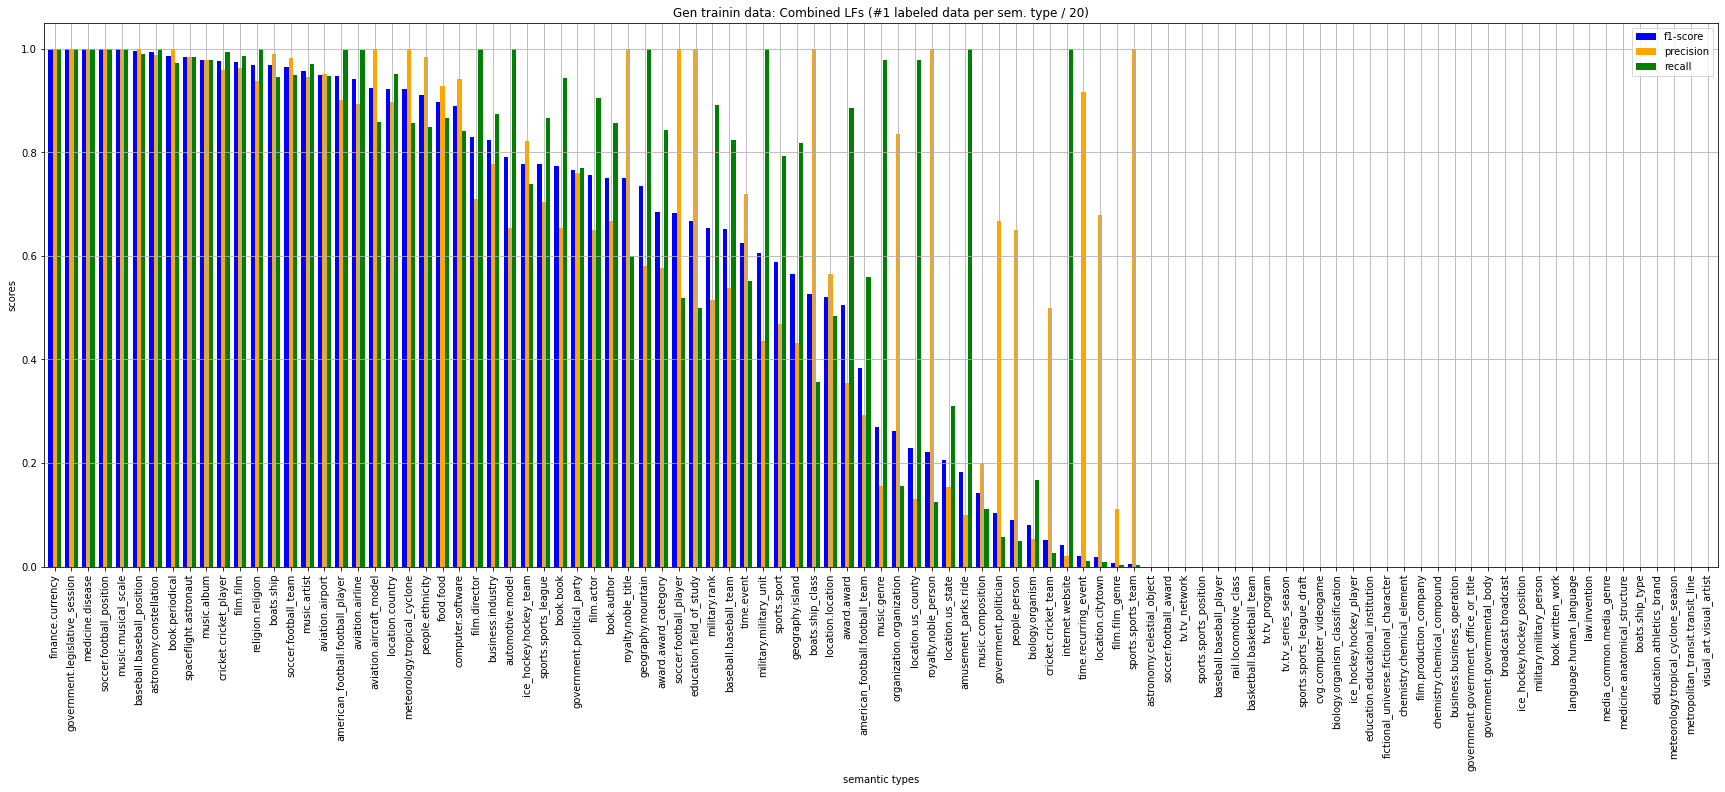

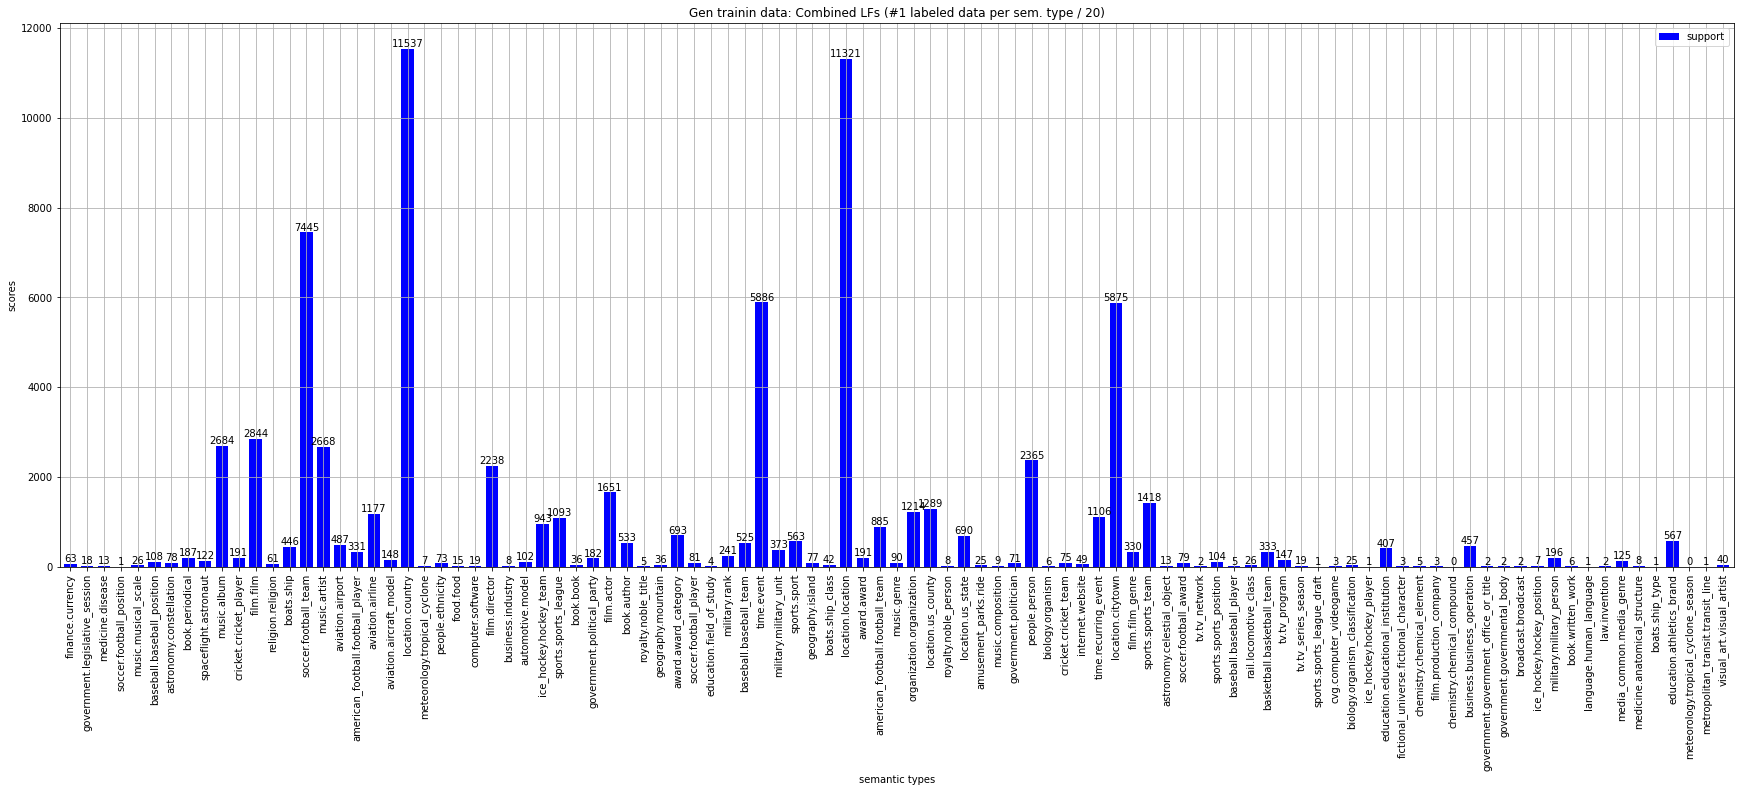

In [12]:
import os
import sys
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt

TYPENAME = "type_turl"
corpus = "turl"
labeled_data_size = 1
test_data_size = 20.0
unlabeled_data_size = "absolute"
distance_threshold = 1e-2
cosine_sim_threshold = 0.9

class_report = results[labeled_data_size-1]

results_per_type = []
for label in class_report.keys():
    if label == "accuracy" or label == "macro avg" or label == "weighted avg":
        continue
    try:
        #if classification_result[label]["support"] > 0:
        results_per_type.append([label, class_report[label]["f1-score"],class_report[label]["precision"], class_report[label]["recall"], class_report[label]["support"]])
    except:
        print(label)
df_result = pd.DataFrame(results_per_type, columns=["label", "f1-score", "precision", "recall", "support"]).sort_values(by="f1-score", ascending=False)


ax = df_result.plot.bar(x="label", y=["f1-score", "precision", "recall"], figsize=(30,10), label=["f1-score", "precision", "recall"], width=0.75, color=["blue", "orange", "green"])

# for container in ax.containers:
#     ax.bar_label(container)

plt.title(f"Gen trainin data: Combined LFs (#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()


# Plot supports per semantic type
ax = df_result.plot.bar(x="label", y=["support"], figsize=(30,10), label=["support"], width=0.75, color=["blue"])

for container in ax.containers:
    ax.bar_label(container)

plt.title(f"Gen trainin data: Combined LFs (#{labeled_data_size} labeled data per sem. type / {20})")
plt.xlabel("semantic types")
plt.ylabel("scores")
plt.grid()
plt.show()